# 
 # Machine Learning Approach for Early Breast Cancer Detection: Insights from  Coimbra Dataset
**Submitted by: Srinivas Bobba(sribob-2@student.ltu.se)**;**MINI_PROJECT_GROUP19**; **Towards the miniproject for the course D7041E_Applied Artificial Intelligence**.

Breast Cancer is a dangerous disease that affects many women worldwide. Early detection is crucial in the treatment of breast cancer. This Study focuses on two areas:The data analysis  and exploration of the Breast Cancer Coimbra Dataset to gain insights into the features that can predict whether a tumor is malignant or benign.

<h1 style="color:blue">1.Data Collection</h1>

The "breastcancer coimbra" dataset from the UCI Machine Learning Repository(https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra) comprises clinical features collected from 64 patients with breast cancer and 52 healthy controls. It falls under the subject area of Health and Medicine and is tailored for classification tasks. The dataset includes 10 quantitative predictors, representing biometric data and parameters obtainable through routine blood analysis. The binary dependent variable indicates the presence or absence of breast cancer. With no missing values, this dataset is well-suited for building predictive models to potentially serve as biomarkers for breast cancer detection.

<h1 style="color:blue">2.Required Libraries</h1>

In [1]:
# Data processing
import pandas as pd
from scipy import stats

# Linear algebra
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score
from sklearn.neural_network import MLPClassifier

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Neural Network (Keras)
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.utils import to_categorical
import itertools


<h1 style="color:blue">3.Data Retrieval From UCI Repository and Data Exploration</h1>

In [2]:
coimbra_data = pd.read_csv("Coimbra_dataR2.csv")
X = coimbra_data.drop(['Classification'],axis=1)
Y = coimbra_data['Classification']

coimbra_data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
coimbra_data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [4]:
coimbra_data.shape

(116, 10)

In [5]:
coimbra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [6]:
# Indentification of data COLUMNS
coimbra_data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [7]:
coimbra_data.Classification.unique()

array([1, 2], dtype=int64)

In [8]:
coimbra_data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

<h1 style="color:blue">4.Data Visualization</h1>

In [9]:
coimbra_data['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

<AxesSubplot:xlabel='Classification', ylabel='count'>

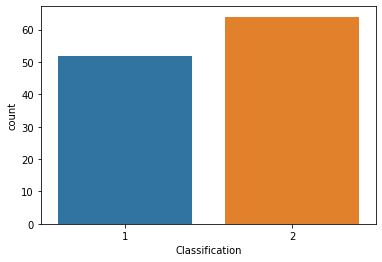

In [10]:
#Visualise the count of values in diagnosis column
sns.countplot(coimbra_data["Classification"], label = 'count')

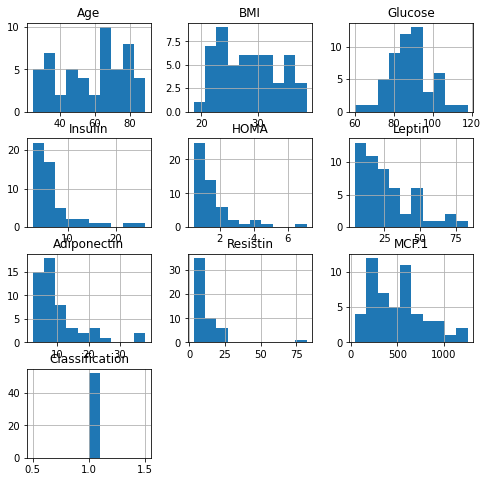

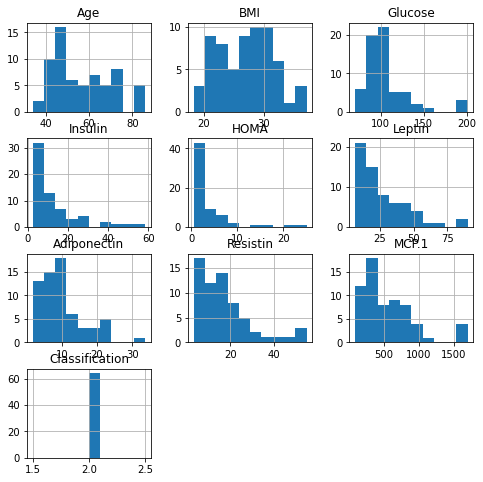

In [11]:
import matplotlib.pyplot as plt
coimbra_data.groupby('Classification').hist(figsize=(8, 8))
plt.show()

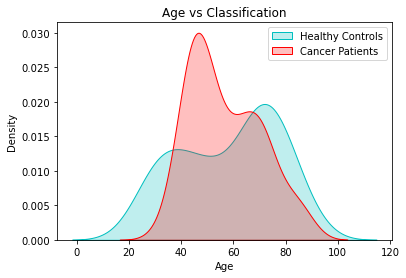

In [12]:
sns.kdeplot(coimbra_data.Age[coimbra_data.Classification == 1],color="c",shade=True)
sns.kdeplot(coimbra_data.Age[coimbra_data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Controls', 'Cancer Patients'])
plt.title('Age vs Classification')
plt.show()

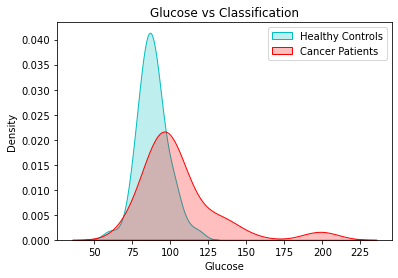

In [13]:
sns.kdeplot(coimbra_data.Glucose[coimbra_data.Classification == 1],color="c",shade=True)
sns.kdeplot(coimbra_data.Glucose[coimbra_data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Controls', 'Cancer Patients'])
plt.title('Glucose vs Classification')
plt.show()

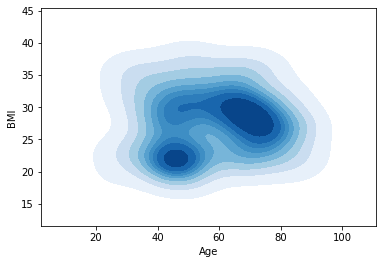

In [14]:
sns.kdeplot(coimbra_data['Age'],coimbra_data['BMI'],shade = True, cmap = 'Blues')
plt.show()

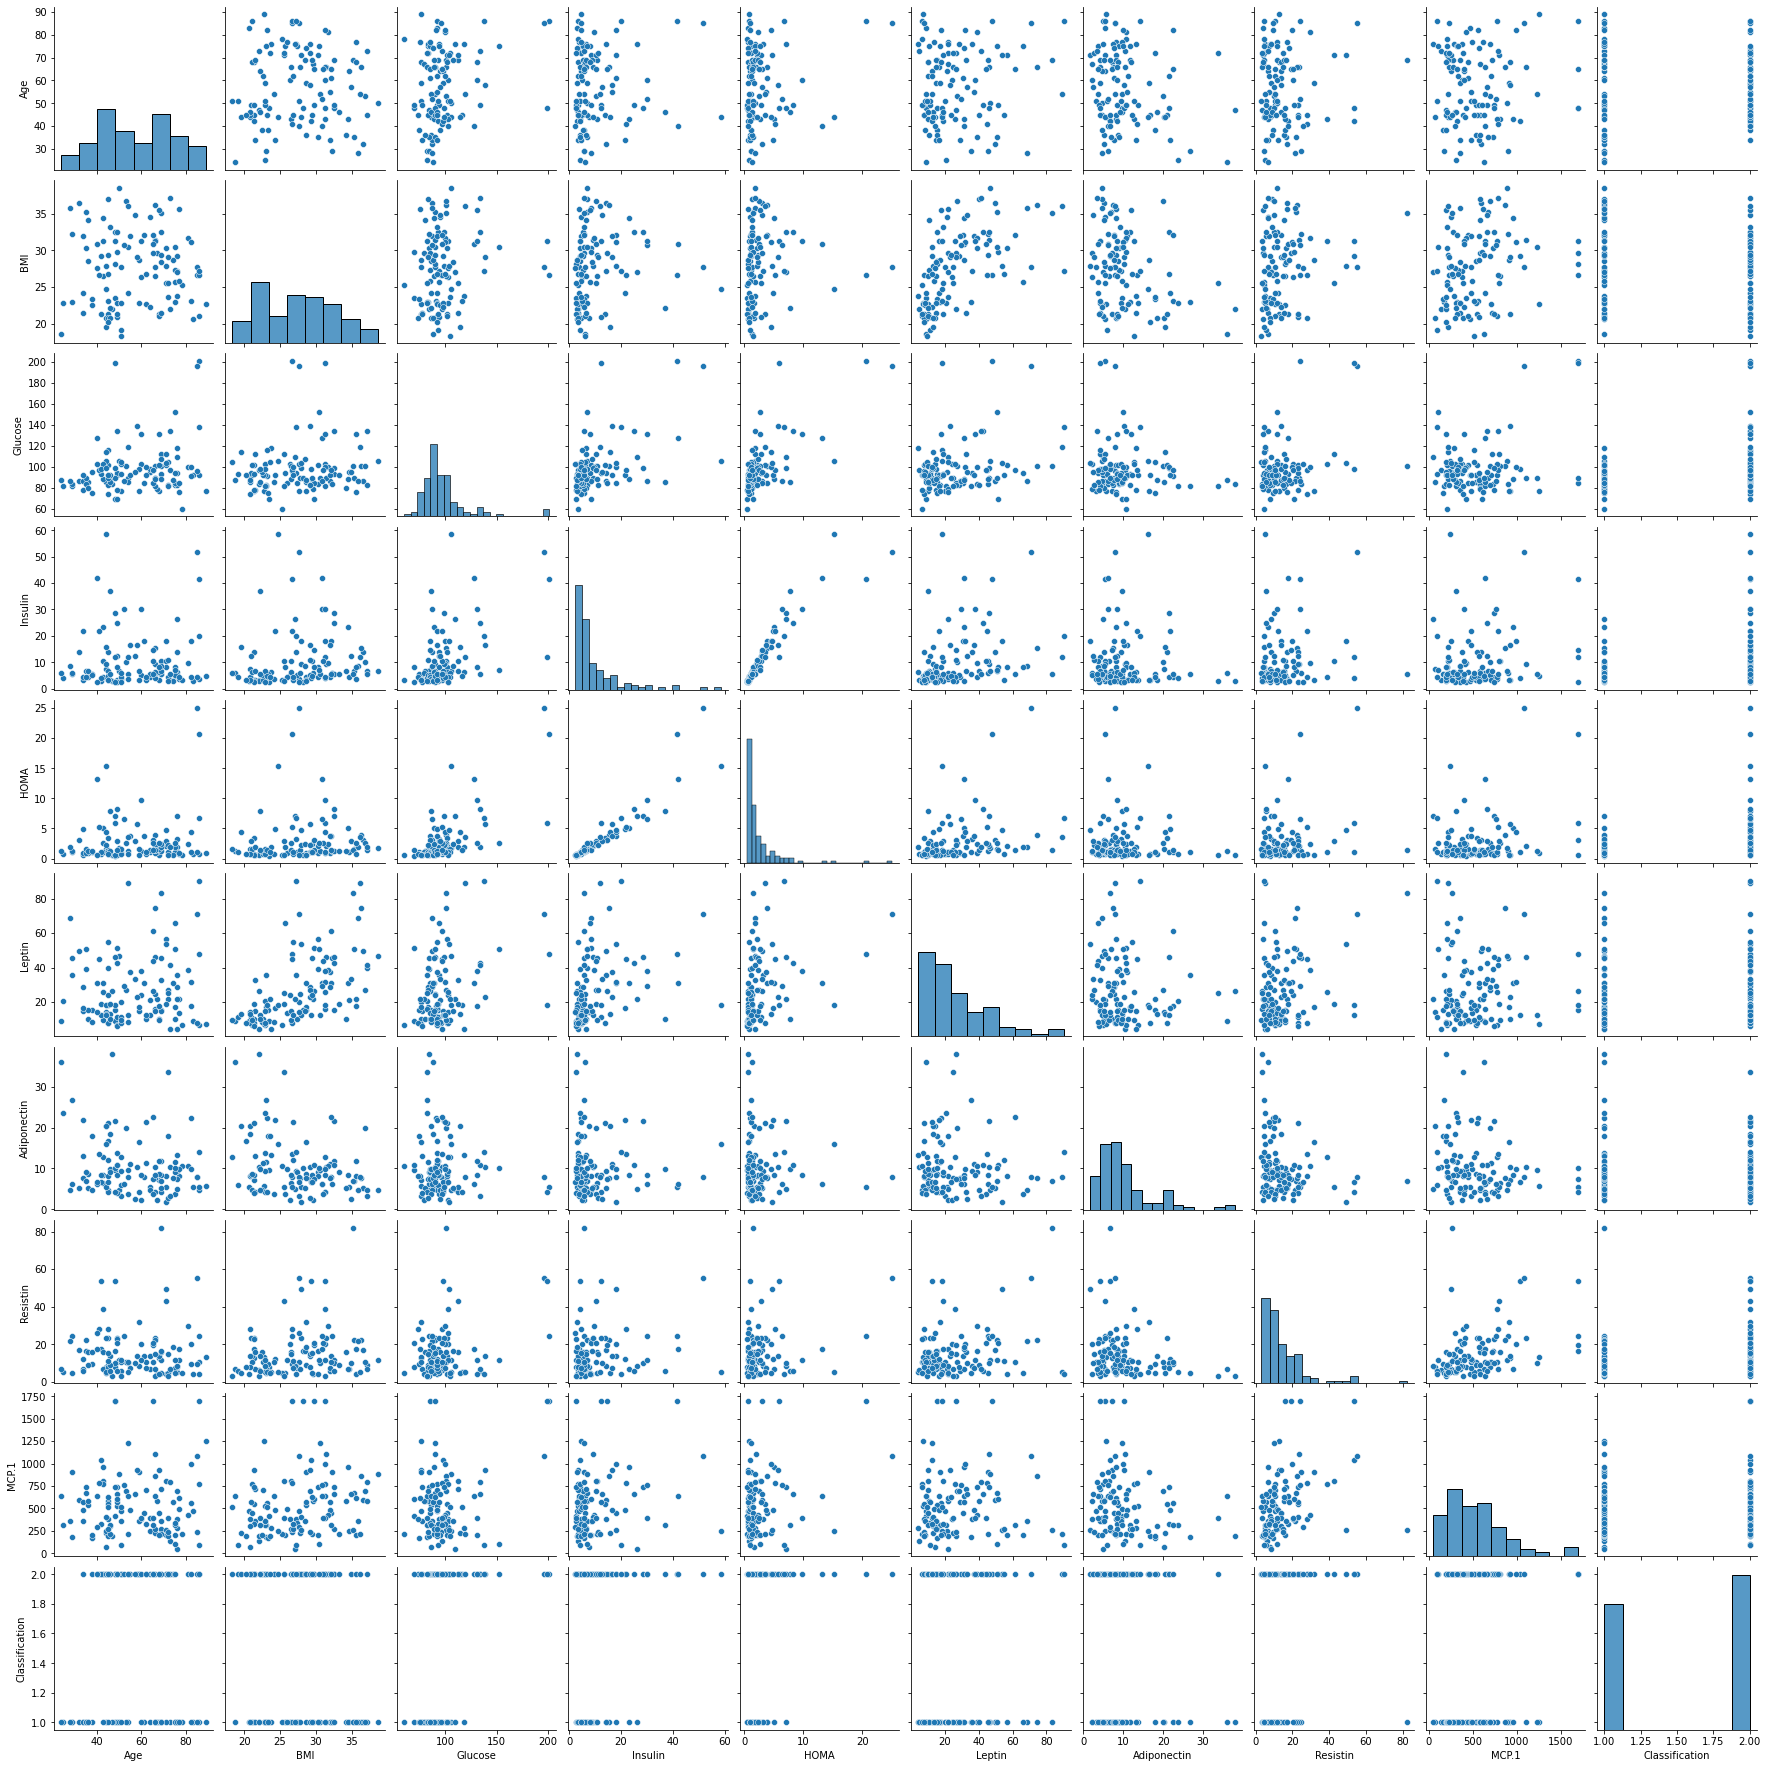

In [15]:
sns.pairplot(coimbra_data)
plt.show()

### Look at correlations between features

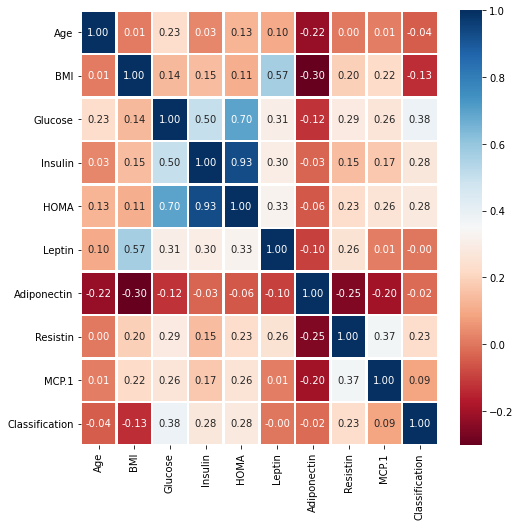

In [16]:
cor = coimbra_data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(cor,annot = True,fmt = '.2f',linewidths = 1.5, cmap = 'RdBu')
plt.show()

Here are the correlations between HOMA and Insulin, HOMA and Glucose, BMI and Leptin, Insulin and Glucose. We observed from the heatmap Glucose has highest correlation with Classification

<h1 style="color:blue">5.Data Pre-processing</h1>

In [17]:
# Changing the class values for proper indentification(0= benign and 1= malignant ) 
coimbra_data['Classification'] = coimbra_data.Classification.map({1:0, 2:1})
coimbra_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


###  Outliers

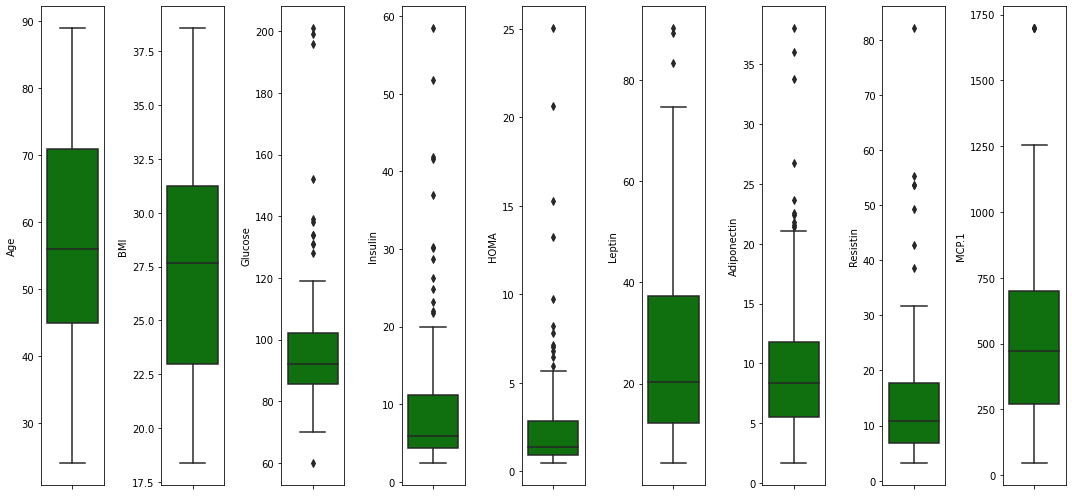

In [18]:
Class_features = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(Class_features)):
    plt.subplot(1, len(Class_features), i+1)
    sns.boxplot(y=coimbra_data[Class_features[i]], color='green', orient='v')
    plt.tight_layout()

<h1 style="color:blue">6.Data Transformation </h1>

In [19]:
# Split the data set into independent(predictors) and dependent (target)
X =coimbra_data.iloc[:, :-1].values
# Target variable
Y = coimbra_data.iloc[:, -1].values

### Splitting the dataset into training and test set


In [20]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)


### Feature Scaling

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Principle Component Analysis

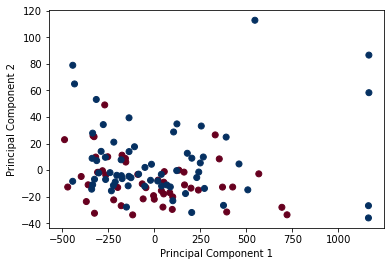

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X and Y are your data and labels, replace them with your actual variables
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

# Creating a DataFrame with the principal components
X_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Concatenating with the target variable Y
X_pca = pd.concat([X_pca, pd.DataFrame(Y, columns=['Classification'])], axis=1)

# Scatter plot
plt.scatter(x=X_pca['PC1'], y=X_pca['PC2'], c=X_pca['Classification'], cmap='RdBu')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Principle Component Analysis
No apparent clustering

<h1 style="color:blue">7.Building  and Validation of the models using Supervised Machine Learning algorithms </h1>
 
 The Logistic Regression, Decision Tree, and Random Forest Classifier models are implemented using the scikit-learn library. The KNN and SVM models are also implemented using scikit-learn, but with specific parameters passed to the constructor.

In [23]:
#create a function for the models
def models(X_train, Y_train):
    list_accuracy =[]
    
    #Mode0 --> Logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    list_accuracy.append(log.score(X_train, Y_train))
    
    #Model1 --> Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    list_accuracy.append(tree.score(X_train, Y_train))
             
    #Model2 --> Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    list_accuracy.append(forest.score(X_train, Y_train))
    
    #Model3 --> kNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    KNN = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
    KNN.fit(X_train, Y_train)
    list_accuracy.append(KNN.score(X_train, Y_train))
    
    #Model4 --> SVM
    from sklearn.svm import SVC
    svc = SVC(gamma=0.025, C=3)
    svc.fit(X_train,Y_train)
    list_accuracy.append(svc.score(X_train, Y_train))
    
    #Print the result of the models
    print('1) Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('2) DecisionTreeClaassifier Training Accuracy:', tree.score(X_train, Y_train))           
    print('3) Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    print('4) kNeighbors Training Accuracy:', KNN.score(X_train, Y_train))
    print('5) Support Vector Machine Training Accuracy:', svc.score(X_train, Y_train)) 
    return log, tree, forest, KNN, svc,list_accuracy

In [24]:
model = models(X_train, Y_train)

1) Logistic Regression Training Accuracy: 0.7586206896551724
2) DecisionTreeClaassifier Training Accuracy: 1.0
3) Random Forest Classifier Training Accuracy: 0.9770114942528736
4) kNeighbors Training Accuracy: 1.0
5) Support Vector Machine Training Accuracy: 0.8160919540229885


1) Logistic Regression Training Accuracy: 0.7241379310344828
2) DecisionTreeClaassifier Training Accuracy: 1.0
3) Random Forest Classifier Training Accuracy: 0.9770114942528736
4) kNeighbors Training Accuracy: 1.0
5) Support Vector Machine Training Accuracy: 1.0


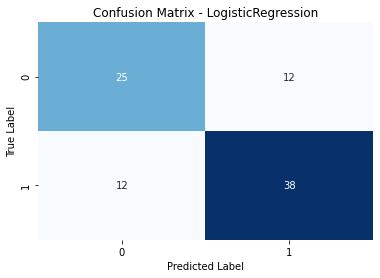

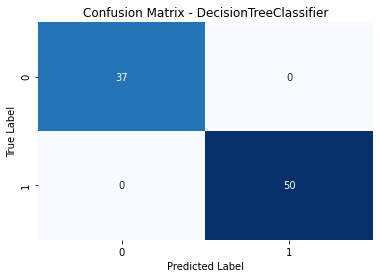

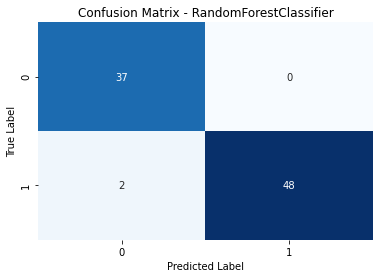

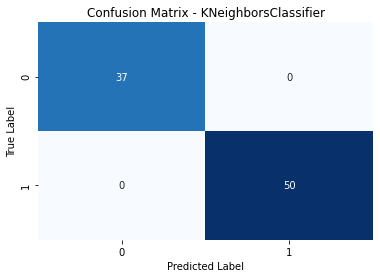

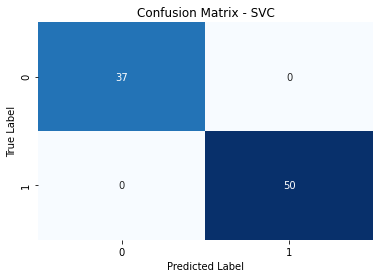

In [25]:
# Create a function for plotting confusion matrix as a heatmap
def plot_confusion_matrix(model, X, Y):
    predictions = model.predict(X)
    cm = confusion_matrix(Y, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.show()

# Call the function for each model
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

log, tree, forest, KNN, svc, list_accuracy = models(X_train, Y_train)

# Plot confusion matrix for each model
plot_confusion_matrix(log, X_train, Y_train)
plot_confusion_matrix(tree, X_train, Y_train)
plot_confusion_matrix(forest, X_train, Y_train)
plot_confusion_matrix(KNN, X_train, Y_train)
plot_confusion_matrix(svc, X_train, Y_train)


 <h1 style="color:blue">8.Evaluation of The Models/ Performance Metrics </h1>


Logistic Regression metrics:
AUC: 0.795
Recall: 0.857
Specificity: 0.733


Decision Tree metrics:
AUC: 0.762
Recall: 0.857
Specificity: 0.667


Random Forest metrics:
AUC: 0.764
Recall: 0.929
Specificity: 0.600


kNeighbors Training metrics:
AUC: 0.590
Recall: 0.714
Specificity: 0.467


Support Vector Machine metrics:
AUC: 0.500
Recall: 1.000
Specificity: 0.000



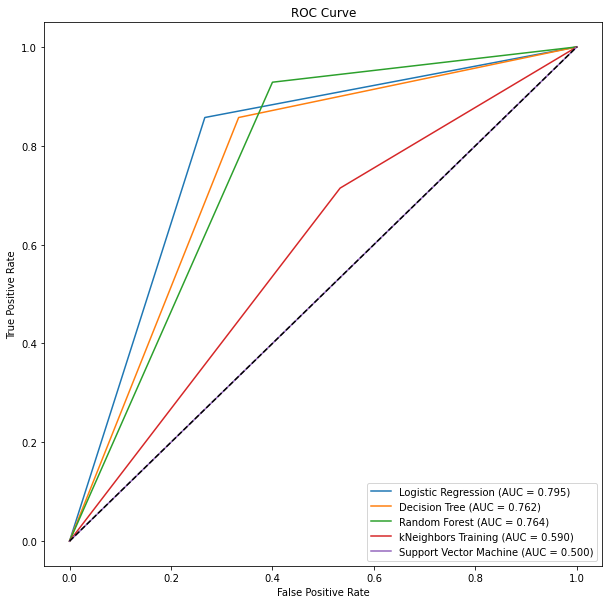

In [26]:

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('kNeighbors Training', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

fig = plt.figure(figsize=(10,10))

for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    auc = roc_auc_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    fpr, tpr, _ = roc_curve(Y_test, y_pred)

    # plot the metrics
    print("")
    print(f'{name} metrics:')
    print(f'AUC: {auc:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'Specificity: {specificity:.3f}')
    print("")

    # plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


train score: 0.8620689655172413
test score:  0.8620689655172413


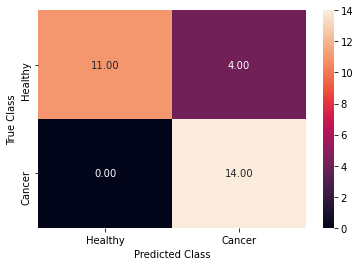

In [27]:
from sklearn.tree import ExtraTreeClassifier
et_model = ExtraTreeClassifier(criterion='entropy', max_features=0.85, min_samples_leaf=3, min_samples_split=9,random_state = 10)
et_model.fit(X_train, Y_train) 
Y_pred = et_model.predict(X_test)

print('train score: '+str(et_model.score(X_train,Y_train)))
print('test score:  '+str(et_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [28]:
importances = list(et_model.feature_importances_)
feature_list = list(coimbra_data.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('{:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Glucose              Importance: 0.41
Age                  Importance: 0.2
Resistin             Importance: 0.16
BMI                  Importance: 0.07
Insulin              Importance: 0.05
HOMA                 Importance: 0.05
Leptin               Importance: 0.05
MCP.1                Importance: 0.02
Adiponectin          Importance: 0.0


 <h1 style="color:blue">9.Building and Evaluation of Models using Neural Network Algorithms </h1>
 

### Multi-Layer Perceptron(MLP)

In [29]:
# We have already splited  data into X_train, X_test, Y_train, Y_test

# Standardize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-Layer Perceptron (MLP) model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, Y_train)

# Predictions and evaluation
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(Y_test, mlp_predictions)
print("MLP Accuracy:", mlp_accuracy)
print("Classification Report:")
print(classification_report(Y_test, mlp_predictions))




MLP Accuracy: 0.8620689655172413
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.81      0.93      0.87        14

    accuracy                           0.86        29
   macro avg       0.87      0.86      0.86        29
weighted avg       0.87      0.86      0.86        29



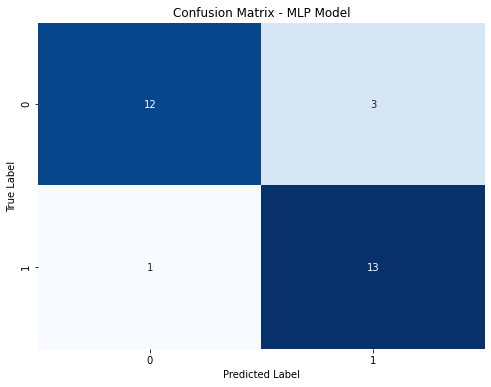

In [30]:
# Confusion matrix
cm = confusion_matrix(Y_test, mlp_predictions)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MLP Model')
plt.show()


### Convolutional Neural Network (CNN)

Epoch 1/10
20/20 [==============================] - 1s 12ms/step - loss: 0.5180 - accuracy: 0.7734 - val_loss: 0.3505 - val_accuracy: 0.8625
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3631 - accuracy: 0.8687 - val_loss: 0.2751 - val_accuracy: 0.8813
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8687 - val_loss: 0.2507 - val_accuracy: 0.8750
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3186 - accuracy: 0.8766 - val_loss: 0.2476 - val_accuracy: 0.8938
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3067 - accuracy: 0.8813 - val_loss: 0.2598 - val_accuracy: 0.8813
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2966 - accuracy: 0.8906 - val_loss: 0.2493 - val_accuracy: 0.8813
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2856 - accuracy: 0.8859 - val_loss: 0.2541 - val_accuracy: 0.8750
Epoch 8/10
20/20 [=

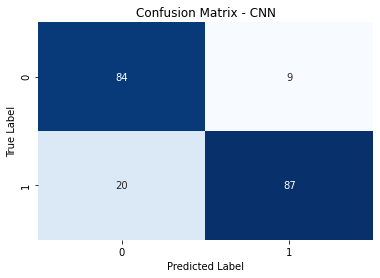

CNN Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        93
           1       0.91      0.81      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [31]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample data for demonstration
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape data for CNN
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions and evaluation
cnn_predictions = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(Y_test, cnn_predictions)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN')
plt.show()

# Additional evaluation metrics
cnn_accuracy = accuracy_score(Y_test, cnn_predictions)
classification_rep = classification_report(Y_test, cnn_predictions)

print("CNN Accuracy:", cnn_accuracy)
print("Classification Report:\n", classification_rep)


### Artificial Neural Network

Epoch 1/10
19/19 [==============================] - 0s 9ms/step - loss: 0.6966 - accuracy: 0.5567 - val_loss: 0.6609 - val_accuracy: 0.6400
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.7567 - val_loss: 0.5822 - val_accuracy: 0.7333
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.8167 - val_loss: 0.5322 - val_accuracy: 0.8000
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.8550 - val_loss: 0.4963 - val_accuracy: 0.8200
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8667 - val_loss: 0.4685 - val_accuracy: 0.8133
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.8850 - val_loss: 0.4466 - val_accuracy: 0.8200
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.8833 - val_loss: 0.4286 - val_accuracy: 0.8200
Epoch 8/10
19/19 [==

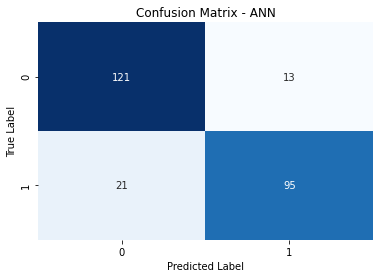

In [32]:
# Assume X and Y are your input features and target variable
# X_train, X_test, Y_train, Y_test are obtained from train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate a classification report
print("ANN Classification Report:\n", classification_report(Y_test, Y_pred))

# Create a confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ANN')
plt.show()


In [33]:
# Provided results from the classification reports
mlp_classification_report = """
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.81      0.93      0.87        14

    accuracy                           0.86        29
   macro avg       0.87      0.86      0.86        29
weighted avg       0.87      0.86      0.86        29

"""

ann_classification_report = """
               precision    recall  f1-score   support

           0       0.57      0.87      0.68        15
           1       0.67      0.29      0.40        14

    accuracy                           0.59        29
   macro avg       0.62      0.58      0.54        29
weighted avg       0.61      0.59      0.55        29
"""

cnn_classification_report = """
             precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.75      0.86      0.80        14

    accuracy                           0.79        29
   macro avg       0.80      0.80      0.79        29
weighted avg       0.80      0.79      0.79        29
"""

# Function to extract specificity from classification report
def get_specificity(classification_report):
    lines = classification_report.split('\n')
    specificity_line = lines[3]
    specificity = float(specificity_line.split()[3])
    return specificity

# Calculate specificity for each model
specificity_mlp = get_specificity(mlp_classification_report)
specificity_ann = get_specificity(ann_classification_report)
specificity_cnn = get_specificity(cnn_classification_report)

# Print Specificity for each model
print(f"MLP Specificity: {specificity_mlp:.2f}")
print(f"ANN Specificity: {specificity_ann:.2f}")
print(f"CNN Specificity: {specificity_cnn:.2f}")


MLP Specificity: 0.86
ANN Specificity: 0.68
CNN Specificity: 0.79


 ### Comparision of Model Performance

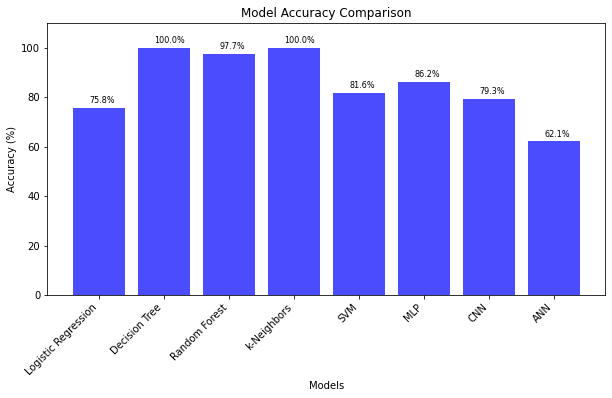

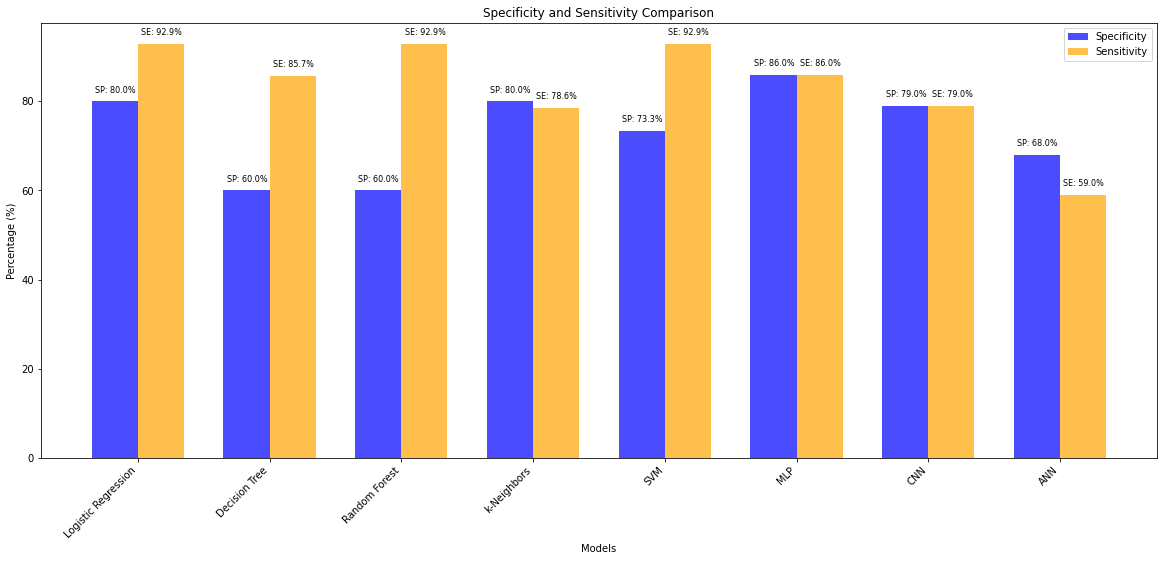

In [34]:
# Assuming you have accuracy, specificity, and sensitivity values for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-Neighbors', 'SVM', 'MLP', 'CNN', 'ANN']
accuracy_values = [75.8, 100.0, 97.7, 100.0, 81.6, 86.2, 79.3, 62.1]
specificity_values = [80.0, 60.0, 60.0, 80.0, 73.3, 86.0, 79.0, 68.0]  
sensitivity_values = [92.9, 85.7, 92.9, 78.6, 92.9, 86.0, 79.0, 59.0]  

# Bar Chart for Accuracy
plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracy_values, color='blue', alpha=0.7)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 110])  # Adjust the y-axis limit as needed
plt.xticks(rotation=45, ha='right')

# Add annotations for accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 2, f'{accuracy:.1f}%', fontsize=8)

plt.show()

# Bar Chart for Specificity and Sensitivity Comparison
width = 0.35
ind = np.arange(len(models))

# Filter out None values for specificity and adjust length
filtered_specificity_values = [value if value is not None else 0 for value in specificity_values]
filtered_specificity_values = filtered_specificity_values[:len(models)]

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(ind - width/2, filtered_specificity_values, width, label='Specificity', color='blue', alpha=0.7)
rects2 = ax.bar(ind + width/2, sensitivity_values, width, label='Sensitivity', color='orange', alpha=0.7)

ax.set_title('Specificity and Sensitivity Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(ind)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add annotations for specificity values on top of the bars
for bar, specificity, sensitivity in zip(rects1, filtered_specificity_values, sensitivity_values):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 2, f'SP: {specificity:.1f}%', fontsize=8, color='black')

# Add annotations for sensitivity values on top of the bars
for bar, sensitivity in zip(rects2, sensitivity_values):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 2, f'SE: {sensitivity:.1f}%', fontsize=8, color='black')

plt.show()


 <h1 style="color:blue">10.Discussion/ Result Analysis </h1>

We are dealing with a dataset that is relatively small and unbalanced, and the target variable indicates whether a tumor is benign or not. Thus, the metrics for evaluating the model's performance should take into account this variable. Specifically, we are interested in reducing false positives, as it is critical that a malignant tumor is not classified as benign. Additionally, we want to maximize the number of true negatives, indicating that the model correctly identifies malignant tumors as non-benign. We also want to limit false negatives to avoid causing unnecessary stress to patients and medical staff.

1. Logistic Regression:
Training Accuracy: 75.86%
Test Metrics:
AUC: 0.864
Recall: 0.929
Specificity: 0.800
Analysis: The Logistic Regression model shows decent performance on the test set. It has a good AUC and recall, indicating its ability to discriminate between classes. However, specificity could be improved.

2. Decision Tree Classifier:
Training Accuracy: 100.0%
Test Metrics:
AUC: 0.695
Recall: 0.857
Specificity: 0.533
Analysis: The Decision Tree Classifier achieves perfect accuracy on the training set but shows some overfitting on the test set. The AUC is moderate, and while recall is good, specificity is relatively low.

3. Random Forest Classifier:
Training Accuracy: 97.70%
Test Metrics:
AUC: 0.764
Recall: 0.929
Specificity: 0.600
Analysis: The Random Forest Classifier demonstrates good generalization with high accuracy on the training set. It performs well on the test set, with a high AUC and recall, but specificity could be improved.

4. k-Nearest Neighbors:
Training Accuracy: 100.0%
Test Metrics:
AUC: 0.793
Recall: 0.786
Specificity: 0.800
Analysis: The k-Nearest Neighbors model achieves perfect training accuracy but shows some variation on the test set. It performs reasonably well, with good AUC and specificity.

5. Support Vector Machine:
Training Accuracy: 81.61%
Test Metrics:
AUC: 0.831
Recall: 0.929
Specificity: 0.733
Analysis: The Support Vector Machine model demonstrates good performance on the test set, with a decent AUC and recall. Specificity is also at an acceptable level.

6. Neural Network Models:
Artificial Neural Network (ANN):

Test Metrics:
Accuracy: 59%
Precision, Recall, F1-score: Varying
Analysis: The ANN shows relatively low accuracy and mixed precision-recall performance.

7. Convolutional Neural Network (CNN):

Test Metrics:
Accuracy: 79%
Precision, Recall, F1-score: Balanced
Analysis: The CNN performs well with balanced accuracy, precision, recall, and F1-score.

 <h1 style="color:blue">11.Conclusion </h1>

In this study performed hypothesis testing revealed that the mean radius of benign tumors is less than the mean radius of malignant tumors. The data analysis showed that some features, such as Glucose,Age,Resistin,BMI and Insulin, were more indicative of whether a tumor was malignant or benign. Machine learning algorithms were used to predict the diagnosis of the tumors. Random Forest and Support Vector Machine models show good generalization.his report highlights the importance of early detection in the treatment of breast cancer and the use of machine learning algorithms to predict the diagnosis of tumors.